In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(file))))

import threerra # Load threerra

import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [2]:
# Load IMB Quantum credentials
from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# Choose device
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')

# Test draw

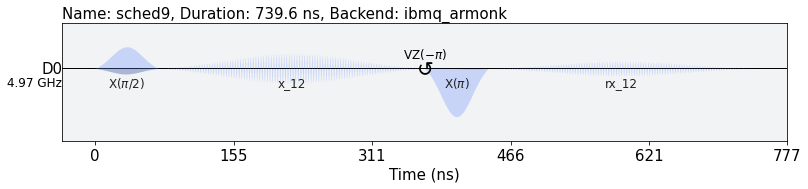

In [4]:
# Test QuantumCircuit3
qc = threerra.QuantumCircuit3(backend)
qc.rx_01(np.pi/2)
qc.x_12()
qc.rz(np.pi)
qc.x_01()
qc.rx_12(np.pi/2)
qc.draw() # You can pass arguments to draw()

# Test calibrations

In [5]:
qc.calibrate_freq_01()

Calibrating qubit_freq_est_01...
Job Status: job has successfully run
qubit_freq_est_01 updated from 4.971595089951107GHz to 4.971583252011542GHz.


In [6]:
qc.calibrate_pi_amp_01()

Calibrating pi_amp_01...
Job Status: job has successfully run
pi_amp_01 updated from 0.1556930479027419 to 0.25020339265292146.


In [7]:
qc.calibrate_freq_12()

Calibrating qubit_freq_est_12...
Job Status: job has successfully run
qubit_freq_est_12 updated from 4.624402158468281GHz to 4.622937542467993GHz.


In [8]:
qc.calibrate_pi_amp_12()

Calibrating pi_amp_12...
Job Status: job has successfully run
pi_amp_12 updated from 0.2797548240848574 to 0.3284615055672541.


# Test Measurement 

In [9]:
from threerra.tools import get_counts

from threerra.discriminators.nearest_discriminator import discriminator as nst_disc
from threerra.discriminators.LDA_discriminator import discriminator as lda_disc

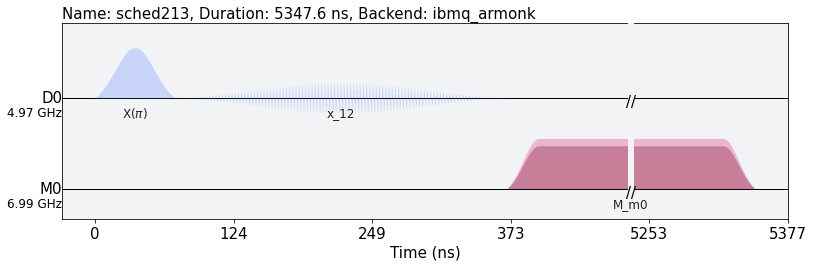

In [10]:
qc2 = threerra.QuantumCircuit3(backend)
qc2.x_01()
qc2.x_12()
qc2.measure()
qc2.draw()

In [11]:
job2 = qc2.run()
job_monitor(job2)

Job Status: job has successfully run


In [12]:
result2 = job2.result()

In [13]:
counts_nst2 = get_counts(result2, discriminator=nst_disc)
counts_lda2 = get_counts(result2, discriminator=lda_disc)

In [14]:
state2_teo = {'0': 0, '1': 0, '2': 1024}

In [15]:
comparision2 = [counts_nst2, counts_lda2, state2_teo]

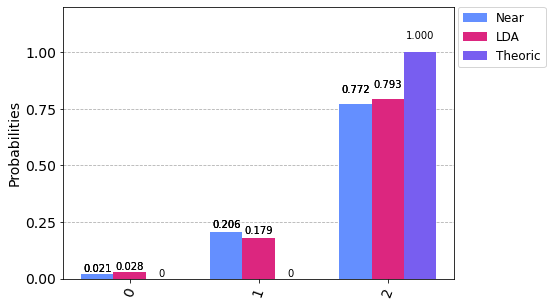

In [16]:
plot_histogram(comparision2, legend=['Near','LDA', 'Theoric'])

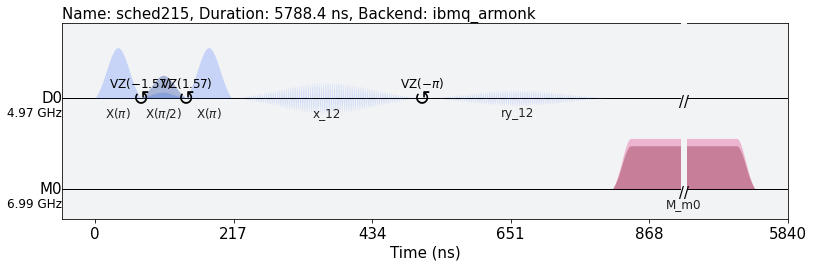

In [17]:
qc012 = threerra.QuantumCircuit3(backend)

qc012.x_01()
qc012.ry_01(np.pi/2.0)

qc012.x_01()
qc012.x_12()
qc012.ry_12(np.pi/2.0)


qc012.measure()
qc012.draw()

In [18]:
job012 = qc012.run()
job_monitor(job012)

Job Status: job has successfully run


In [19]:
result012 = job012.result()

In [20]:
counts_lda012 = get_counts(result012, discriminator=lda_disc)
counts_nst012 = get_counts(result012, discriminator=nst_disc)

In [21]:
state012_teo = {'0': 342, '1': 341, '2': 341}

In [22]:
comparision012 = [counts_nst012, counts_lda012, state012_teo]

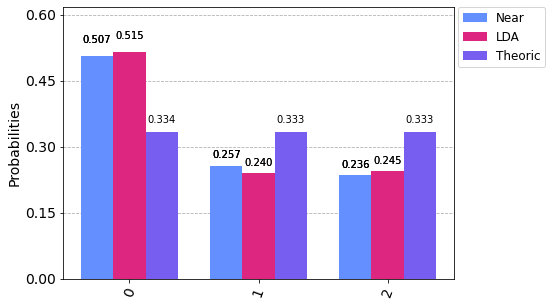

In [23]:
plot_histogram(comparision012, legend=['Near','LDA', 'Theoric'])

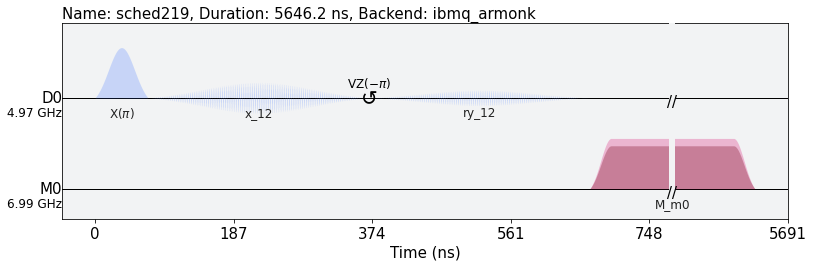

In [24]:
qc12 = threerra.QuantumCircuit3(backend)
qc12.x_01()
qc12.x_12()
qc12.ry_12(np.pi/2.0)
qc12.measure()
qc12.draw()

In [25]:
job12 = qc12.run()
job_monitor(job12)

Job Status: job has successfully run


In [26]:
result12 = job12.result()

In [27]:
counts_lda12 = get_counts(result12, discriminator=lda_disc)
counts_nst12 = get_counts(result12, discriminator=nst_disc)


In [28]:
state12_teo = {'0': 0, '1': 512, '2': 512}

In [29]:
comparision12 = [counts_nst12, counts_lda12, state12_teo]

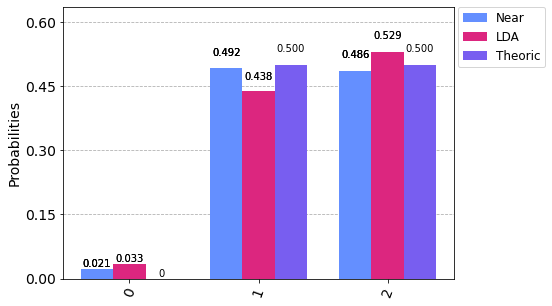

In [30]:
plot_histogram(comparision12, legend=['Near','LDA', 'Theoric'])